<a href="https://colab.research.google.com/github/epsbans/Praticando-Python/blob/main/Emissao_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Coleta de dados

a) Carregando dataset

In [ ]:
df = pd.read_csv("emissaoCO2.csv", sep=';')

b) Verificando o formato (linhas, colunas)

In [ ]:
df.shape

(7385, 2)

c) Mostrando as 5 primeiras linhas

In [ ]:
df.head()

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196.0
1,2.4,221.0
2,1.5,136.0
3,3.5,255.0
4,3.5,NaN


d) Mostrando as 5 últimas linhas

In [ ]:
df.tail()

,Engine Size(L),CO2 Emissions(g/km)
7380,2.0,219.0
7381,2.0,232.0
7382,2.0,240.0
7383,2.0,232.0
7384,2.0,248.0


# 2. Limpeza e preparação dos dados

a) Verificando nulos

In [ ]:
df.isnull().sum()

,0
Engine Size(L),5
CO2 Emissions(g/km),12


b) Tratamento dos valores nulos

In [ ]:
# Preenchendo os dados nulos em Engine Size(L) com a mediana
mediana_engine = df['Engine Size(L)'].median()
df.fillna({'Engine Size(L)': mediana_engine}, inplace=True)

# Preenchendo os dados nulos em CO2 Emissions(g/km) com a mediana
mediana_co2 = df['CO2 Emissions(g/km)'].median()
mediana_co2
df.fillna({'CO2 Emissions(g/km)': mediana_co2}, inplace=True)

c) Tratamento dos valores negativos


In [ ]:
df = df[(df['Engine Size(L)'] >= 0) & (df['CO2 Emissions(g/km)'] >= 0)]

d) Visualizando outliers com boxplots

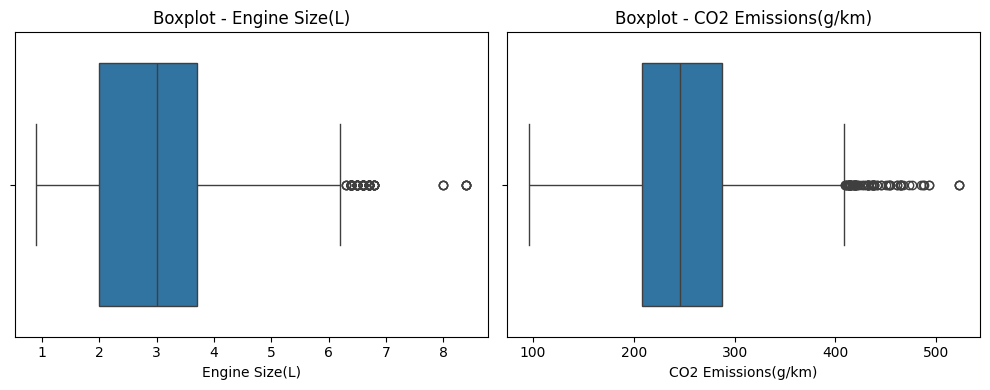

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Engine Size(L)')
plt.title('Boxplot - Engine Size(L)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='CO2 Emissions(g/km)')
plt.title('Boxplot - CO2 Emissions(g/km)')

plt.tight_layout()
plt.show()

In [ ]:
#Tratamento dos outliers
# Substituindo valores negativos em Engine Size(L) pela mediana
df.loc[df["Engine Size(L)"] < 0, "Engine Size(L)"] = mediana_engine

# Verificando se ainda existem valores negativos em Engine Size(L)
df.loc[df["Engine Size(L)"] < 0]

# Substituindo valores negativos em CO2 Emissions(g/km) pela mediana
df.loc[df["CO2 Emissions(g/km)"] < 0, "CO2 Emissions(g/km)"] = mediana_co2

# Verificando se ainda existem valores negativos em CO2 Emissions(g/km)
df.loc[df["CO2 Emissions(g/km)"] < 0]

,Engine Size(L),CO2 Emissions(g/km)


## 3. Divisão em treino e teste

In [ ]:
X = df[['Engine Size(L)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Treinamento do modelo

a) Definindo variáveis independentes (x) e dependente (y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 5. Avaliação do modelo

a) Realizando predições



In [ ]:
y_pred = model.predict(X_test)

b) Gráfico de dispersão

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


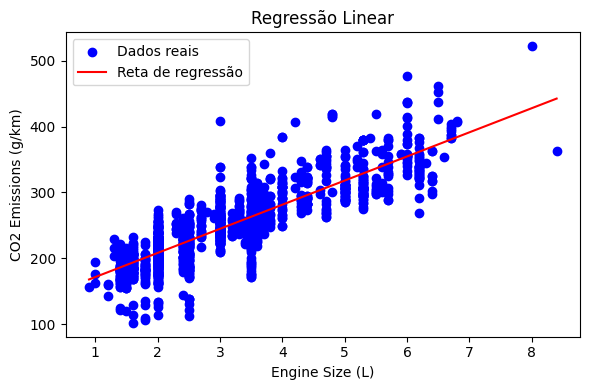

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Reta de regressão')
plt.title("Regressão Linear")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend()
plt.tight_layout()
plt.show()

# Métricas

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 22.52541916851112
MSE: 892.9796935755932
R²: 0.738277711141595


## 6. Interpretação / uso do modelo

Com R² de apenas 0.15, este modelo de regressão linear é fraco e faz previsões pouco precisas das emissões de CO₂ baseadas no tamanho do motor. Isso indica que outras variáveis podem influenciar significativamente as emissões, e que o tamanho do motor sozinho não é suficiente para explicar a maior parte da variação nos dados.

a) Uso da regressão linear para novos valores de X; Interagindo com o usuário

In [ ]:
num = float(input("Digite o valor do Engine Size(L) entre 1 e 10: "))
dado = pd.DataFrame({'Engine Size(L)': [num]})
previsao = model.predict(dado)
print(previsao)

Digite o valor do Engine Size(L) entre 1 e 10: 7
[391.20550452]
